In [1]:
import torch.nn as nn
from torch.optim import SGD, Adam
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss

from LeNet import LeNet
from LeNet import C1, C3_simplified, C5
from LeNet import S2_avgPooling, S2_maxPooling, S4_avgPooling, S4_maxPooling
from LeNet import F6, RBF
from LeNet import Reshape, Flatten

%load_ext autoreload
%autoreload 2

In [2]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [13]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [4]:
LeNet_5_maxPooling = LeNet(
    Reshape(),
    C1,
    nn.Sigmoid(),
    S2_maxPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_maxPooling,
    Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5_maxPooling.initialize(learning_rate=0.9)
LeNet_5_maxPooling.apply(init_weights)
LeNet_5_maxPooling.train(mode=True, data=mnist_train, epochs=5)

[epoch 1, batch 46] loss: 2.359466148459393
[epoch 1, batch 92] loss: 2.315754957821058
[epoch 1, batch 138] loss: 2.30796334017878
[epoch 1, batch 184] loss: 2.3067817377007525
[epoch 1, batch 230] loss: 2.3042403355888696
[epoch 2, batch 46] loss: 2.535063142361848
[epoch 2, batch 92] loss: 2.002627025479856
[epoch 2, batch 138] loss: 1.3675149186797764
[epoch 2, batch 184] loss: 1.126435653023098
[epoch 2, batch 230] loss: 1.0164751319781593
[epoch 3, batch 46] loss: 1.075347073700117
[epoch 3, batch 92] loss: 0.9099733544432599
[epoch 3, batch 138] loss: 0.7935932382293369
[epoch 3, batch 184] loss: 0.7657445397066034
[epoch 3, batch 230] loss: 0.7130359255749247
[epoch 4, batch 46] loss: 0.7594937397086102
[epoch 4, batch 92] loss: 0.6882761781630309
[epoch 4, batch 138] loss: 0.6468359957570615
[epoch 4, batch 184] loss: 0.6319500596626945
[epoch 4, batch 230] loss: 0.6379661987657133
[epoch 5, batch 46] loss: 0.6854801450086676
[epoch 5, batch 92] loss: 0.5969659789748814
[epoch

LeNet(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten()
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

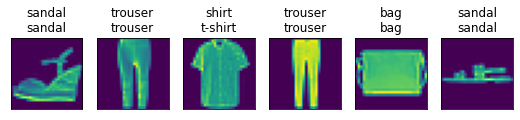

In [5]:
predict_fashion_mnist(LeNet_5_maxPooling, mnist_test)

In [6]:
training_loss = evaluate_loss(LeNet_5_maxPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_maxPooling, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.5434975983937581
Validation Loss (10000 samples): 
0.564181683921814


In [7]:
training_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.79065
Validation accuracy (10000 samples): 
0.7814


In [15]:
LeNet_5_avgPooling = LeNet(
    C1,
    nn.Sigmoid(),
    S2_avgPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_avgPooling,
    Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5_avgPooling.initialize(learning_rate=0.9)
LeNet_5_avgPooling.apply(weight_reset)
LeNet_5_avgPooling.apply(init_weights)
LeNet_5_avgPooling.train(mode=True, data=mnist_train, epochs=5)

[epoch 1, batch 46] loss: 2.3546306620473447
[epoch 1, batch 92] loss: 2.313937907633574
[epoch 1, batch 138] loss: 2.309389591217041
[epoch 1, batch 184] loss: 2.3073459034380703
[epoch 1, batch 230] loss: 2.305711207182511
[epoch 2, batch 46] loss: 2.5546284603035967
[epoch 2, batch 92] loss: 2.298353542452273
[epoch 2, batch 138] loss: 2.169338936391084
[epoch 2, batch 184] loss: 1.507418508115022
[epoch 2, batch 230] loss: 1.18001433559086
[epoch 3, batch 46] loss: 1.1804667814918186
[epoch 3, batch 92] loss: 1.004103527120922
[epoch 3, batch 138] loss: 0.9335404168004575
[epoch 3, batch 184] loss: 0.8999446189921835
[epoch 3, batch 230] loss: 0.8541543548521788
[epoch 4, batch 46] loss: 0.9136660060156947
[epoch 4, batch 92] loss: 0.7919606449811355
[epoch 4, batch 138] loss: 0.7579746440700863
[epoch 4, batch 184] loss: 0.7121518176534901
[epoch 4, batch 230] loss: 0.7179048696289891
[epoch 5, batch 46] loss: 0.7653033707452856
[epoch 5, batch 92] loss: 0.6695145537023959
[epoch 

LeNet(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

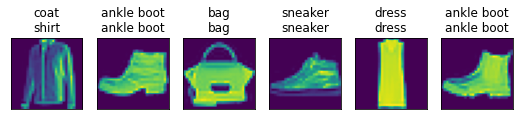

In [16]:
predict_fashion_mnist(LeNet_5_avgPooling, mnist_test)

In [17]:
training_loss = evaluate_loss(LeNet_5_avgPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_avgPooling, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.6208928213755289
Validation Loss (10000 samples): 
0.6418011322021484


In [18]:
training_accuracy = evaluate_accuracy(LeNet_5_avgPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_avgPooling, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.7658666666666667
Validation accuracy (10000 samples): 
0.7583
